In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from sklearn import metrics

In [2]:
!ls

Ball_BA_RSR.v1.2.xlsx
landsat_8_hsi_simulation.ipynb
MicasenseQEvals_trim.csv
RedEdge_3_Filters_srs.xlsx
rededge_rsr.csv
rededge_RSR.ipynb
rededge_RSR_area_under_curve.ipynb


In [3]:
l8_rsr_ca = pd.read_excel('./Ball_BA_RSR.v1.2.xlsx', sheet_name='CoastalAerosol')
l8_rsr_b = pd.read_excel('./Ball_BA_RSR.v1.2.xlsx', sheet_name='Blue')
l8_rsr_g = pd.read_excel('./Ball_BA_RSR.v1.2.xlsx', sheet_name='Green')
l8_rsr_r = pd.read_excel('./Ball_BA_RSR.v1.2.xlsx', sheet_name='Red')
l8_rsr_nir = pd.read_excel('./Ball_BA_RSR.v1.2.xlsx', sheet_name='NIR')
l8_rsr_swir1 = pd.read_excel('./Ball_BA_RSR.v1.2.xlsx', sheet_name='SWIR1')
l8_rsr_swir2 = pd.read_excel('./Ball_BA_RSR.v1.2.xlsx', sheet_name='SWIR2')

In [6]:
l8_rsr_ca.head()

,Wavelength,BA RSR [watts],stdev(RSR)
0,427,0.000073,0.000000
1,428,0.000609,0.000086
2,429,0.001628,0.000143
3,430,0.003421,0.000274
4,431,0.008019,0.000606


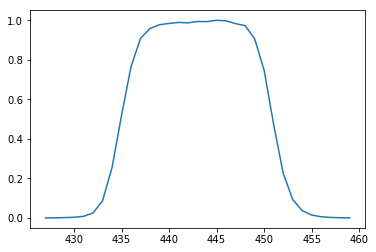

In [7]:
cols = l8_rsr_ca.columns.values
plt.plot(l8_rsr_ca[cols[0]], l8_rsr_ca[cols[1]]);

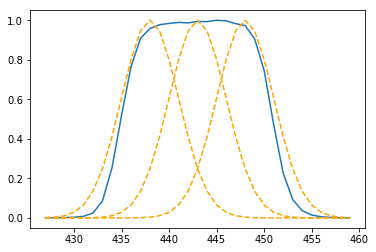

In [60]:
from scipy import signal

st = 3
window = signal.gaussian(l8_rsr_ca.shape[0], std=st)
window_2 = np.roll(window, 5)
window_3 = np.roll(window, -5)

plt.plot(l8_rsr_ca[cols[0]], l8_rsr_ca[cols[1]]);
plt.plot(l8_rsr_ca[cols[0]], window, '--', color='orange')
plt.plot(l8_rsr_ca[cols[0]], window_2, '--', color='orange')
plt.plot(l8_rsr_ca[cols[0]], window_3, '--', color='orange')

In [61]:
# solve least squares equation
from scipy.linalg import lstsq

b = l8_rsr_ca[cols[1]]
a = np.vstack((window, window_2, window_3))

# expects column vectors
x, residues, rank, s = lstsq(a.T, b.T)

In [62]:
# these are the weights
x

array([0.57215824, 0.80518463, 0.80854518])

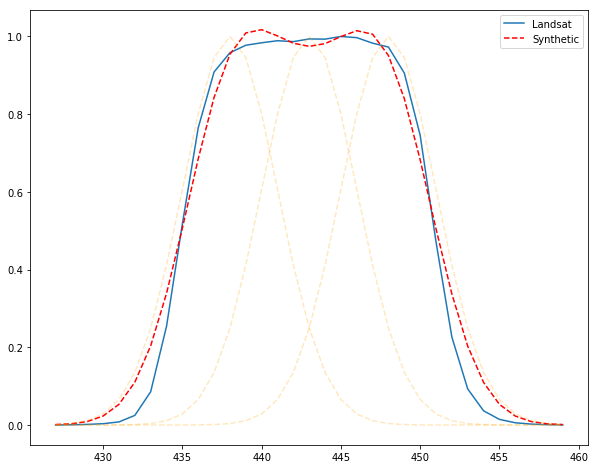

In [65]:
bps = [window, window_2 ,window_3]
synth_band = np.zeros((l8_rsr_ca.shape[0]))
for i,ch in enumerate(x):
    
    synth_band += ch*bps[i]
    
plt.figure(figsize=(10,8))
plt.plot(l8_rsr_ca[cols[0]], l8_rsr_ca[cols[1]], label='Landsat');
plt.plot(l8_rsr_ca[cols[0]], synth_band, '--', color='red', label='Synthetic')
plt.plot(l8_rsr_ca[cols[0]], window, '--', color='orange', alpha=0.25)
plt.plot(l8_rsr_ca[cols[0]], window_2, '--', color='orange', alpha=0.25)
plt.plot(l8_rsr_ca[cols[0]], window_3, '--', color='orange', alpha=0.25)
plt.legend()
plt.show()

In [42]:
######## sample code to calculate synthetic bandpass radiance
# l_hsi = some_data_relevant_to_study
# lmsi_num = np.zeros((l8_rsr_ca.shape[0]))
# lmsi_den = np.zeros((l8_rsr_ca.shape[0]))
# for i,ch in enumerate(x):
    
#     lmsi_num += ch*st*l_hsi[i]
#     lmsi_den += ch*st
    
# lmsi = lmsi_num/lmsi_den
# lmsi_m = lmsi / lmsi.max()